# Simple_Linear_Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [2]:
salary_data = pd.read_csv("Salary_Data.csv")
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and data understanding

In [3]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
salary_data.shape

(30, 2)

In [5]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
salary_data[salary_data.duplicated()]

,YearsExperience,Salary


# Data visualisation

<AxesSubplot:xlabel='Salary', ylabel='Density'>

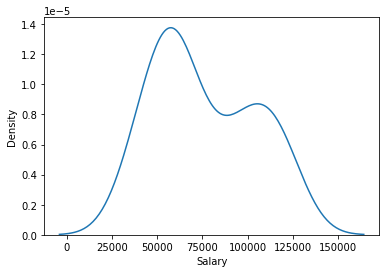

In [9]:
sns.distplot(salary_data['Salary'],hist=False)

In [10]:
salary_data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [11]:
salary_data.kurtosis()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

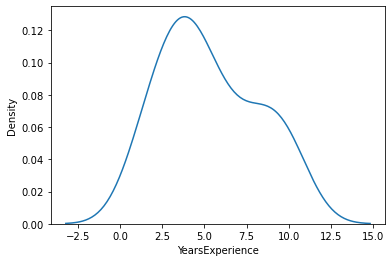

In [12]:
sns.distplot(salary_data['YearsExperience'],hist=False)

In [13]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


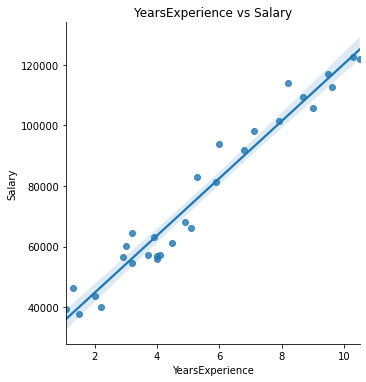

In [14]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title('YearsExperience vs Salary')
plt.show()

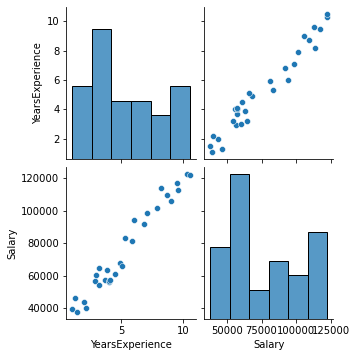

In [15]:
sns.pairplot(salary_data)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

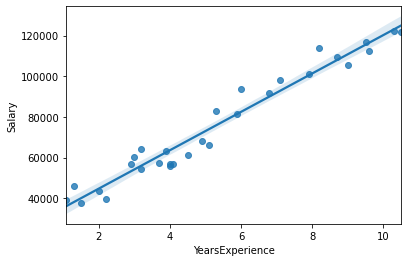

In [16]:
sns.regplot(x="YearsExperience",y="Salary",data=salary_data)

# Model building and model training

In [17]:
model=smf.ols("Salary~YearsExperience",data=salary_data).fit()

In [18]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [19]:
y_pred=model.predict()
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [20]:
error=salary_data['Salary']-y_pred
error

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
Name: Salary, dtype: float64

# model testing

In [21]:
mean_absolute_error(salary_data['Salary'],y_pred)

4644.2012894435375

In [22]:
mean_absolute_percentage_error(salary_data['Salary'],y_pred)

0.07048034398306606

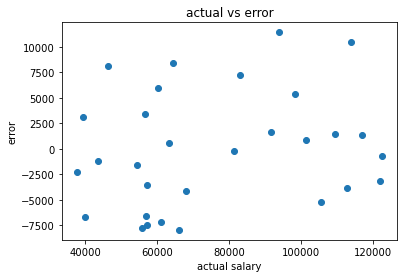

In [23]:
plt.scatter(x=salary_data['Salary'],y=error)
plt.title('actual vs error')
plt.xlabel('actual salary')
plt.ylabel('error')
plt.show()

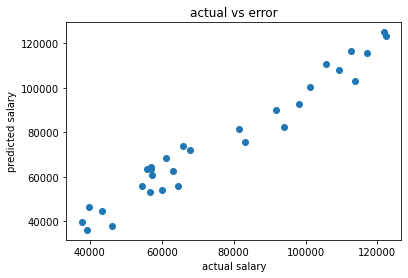

In [24]:
plt.scatter(x=salary_data['Salary'],y=y_pred)
plt.title('actual vs error')
plt.xlabel('actual salary')
plt.ylabel('predicted salary')
plt.show()

In [25]:
print('R-square        : ',round(model.rsquared,4))
print('adj R-square    :',round(model.rsquared_adj,4))
print('AIC             :',model.aic)
print('BIC             :',model.bic)

R-square        :  0.957
adj R-square    : 0.9554
AIC             : 606.882316930432
BIC             : 609.6847116937563


# by using log transformation

In [26]:
salary_data['log_YearsExperience']=np.log(salary_data['YearsExperience'])
salary_data.head()

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


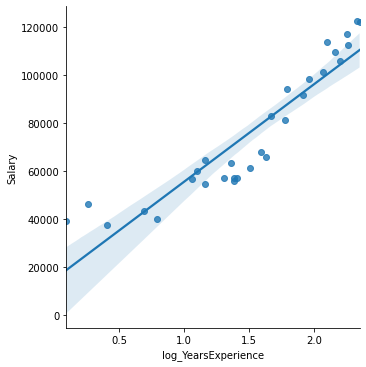

In [27]:
sns.lmplot('log_YearsExperience','Salary',data=salary_data)
plt.show()

In [28]:
log_model=smf.ols('Salary~log_YearsExperience',data=salary_data).fit()

In [29]:
log_model.params

Intercept              14927.97177
log_YearsExperience    40581.98796
dtype: float64

In [30]:
log_y_pred=log_model.predict()
log_y_pred

array([ 18795.84833932,  25575.23519175,  31382.55190541,  43057.2623059 ,
        46925.13887516,  58136.05007933,  59511.84244125,  62130.943929  ,
        62130.943929  ,  68022.71850448,  70159.10586295,  71186.55284173,
        71186.55284173,  72188.62814857,  75966.42257661,  79422.29572936,
        81045.79173698,  82606.82988239,  86959.06670394,  87641.13297709,
        92720.50213746,  94472.51469629,  98805.37138951, 100317.91868441,
       102719.92075053, 104095.71311245, 106289.86843506, 106714.81460019,
       109571.00724698, 110351.45414519])

In [31]:
log_error=salary_data['Salary']-log_y_pred
log_error

0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
Name: Salary, dtype: float64

In [32]:
mean_absolute_error(salary_data['Salary'],log_y_pred)

8443.584664486356

In [33]:
mean_absolute_percentage_error(salary_data['Salary'],log_y_pred)

0.13400219890084664

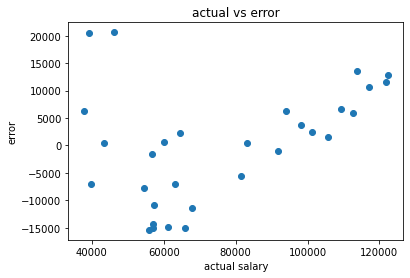

In [34]:
plt.scatter(x=salary_data['Salary'],y=log_error)
plt.title('actual vs error')
plt.xlabel('actual salary')
plt.ylabel('error')
plt.show()

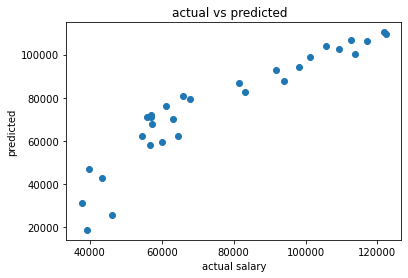

In [35]:
plt.scatter(x=salary_data['Salary'],y=log_y_pred)
plt.title('actual vs predicted  ')
plt.xlabel('actual salary')
plt.ylabel('predicted')
plt.show()

In [36]:
print('R-square        : ',round(log_model.rsquared,4))
print('adj R-square    :',round(log_model.rsquared_adj,4))
print('AIC             :',log_model.aic)
print('BIC             :',log_model.bic)

R-square        :  0.8539
adj R-square    : 0.8487
AIC             : 643.547116619065
BIC             : 646.3495113823893
